In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from citipy import citipy
import timeit

In [3]:
# create a random set of latitudes and longitudes
lats = np.random.uniform(-90.000,90.000, size=1500)
lngs = np.random.uniform(-90.000,90.000, size=1500)
lats_lngs = zip(lats,lngs)
lats_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lats_lngs)

In [5]:
#Get the nearest city using the citipy module.
for coordinate in coordinates: 
    print(citipy.nearest_city(coordinate[0],coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0],coordinate[1]).country_code)

jamestown sh
saint-philippe re
chuy uy
uray ru
kizema ru
port elizabeth za
busselton au
mbandaka cd
taolanaro mg
taolanaro mg
dikson ru
kuytun cn
filadelfia py
barentsburg sj
illoqqortoormiut gl
cape town za
saint george bm
yanam in
lebu cl
namibe ao
tasiilaq gl
mar del plata ar
bathsheba bb
cidreira br
port blair in
saint george bm
margate za
umzimvubu za
hithadhoo mv
olafsvik is
georgetown us
angra pt
loukhi ru
east london za
porbandar in
saint-francois gp
natal br
aktash uz
hermanus za
gat ly
port alfred za
victoria sc
rawson ar
cozumel mx
bacabal br
hermanus za
maniitsoq gl
taolanaro mg
winchester us
adrar dz
adrar dz
stromness gb
creazzo it
cidreira br
rawson ar
mar del plata ar
saint-joseph re
jamestown sh
safaga eg
bunia cd
tumannyy ru
umzimvubu za
pedernales do
taolanaro mg
souillac mu
bubaque gw
bulungu cd
ambilobe mg
hermanus za
qaanaaq gl
taolanaro mg
punta arenas cl
birao cf
urumqi cn
jucuaran sv
mar del plata ar
ushuaia ar
hermanus za
port elizabeth za
manaure co
taolanaro

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [7]:
import requests
from config import weather_api_key
from datetime import datetime

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        

Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | saint-philippe
Processing Record 3 of Set 1 | chuy
Processing Record 4 of Set 1 | uray
Processing Record 5 of Set 1 | kizema
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | mbandaka
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | dikson
Processing Record 11 of Set 1 | kuytun
Processing Record 12 of Set 1 | filadelfia
Processing Record 13 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 14 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | saint george
Processing Record 17 of Set 1 | yanam
Processing Record 18 of Set 1 | lebu
Processing Record 19 of Set 1 | namibe
Processing Record 20 of Set 1 | tasiilaq
Processing Record 21 of Set 1 | mar del plata
Processing Record 22 of Set 1 | bathsheba
Process

In [14]:
# convert to dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,69.39,90,90,8.01,US,2021-10-09 18:35:01
1,Saint-Philippe,-21.3585,55.7679,71.19,85,43,13.65,RE,2021-10-09 18:36:48
2,Chuy,-33.6971,-53.4616,62.96,62,38,11.81,UY,2021-10-09 18:36:45
3,Uray,60.1247,64.7758,34.77,73,36,9.80,RU,2021-10-09 18:38:34
4,Kizema,61.1130,44.8302,44.40,98,100,2.42,RU,2021-10-09 18:38:35


In [17]:
# rearrange columns
new_column_order =["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [19]:
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2021-10-09 18:35:01,42.0970,-79.2353,69.39,90,90,8.01
1,Saint-Philippe,RE,2021-10-09 18:36:48,-21.3585,55.7679,71.19,85,43,13.65
2,Chuy,UY,2021-10-09 18:36:45,-33.6971,-53.4616,62.96,62,38,11.81
3,Uray,RU,2021-10-09 18:38:34,60.1247,64.7758,34.77,73,36,9.80
4,Kizema,RU,2021-10-09 18:38:35,61.1130,44.8302,44.40,98,100,2.42


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [22]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1633805747.813855

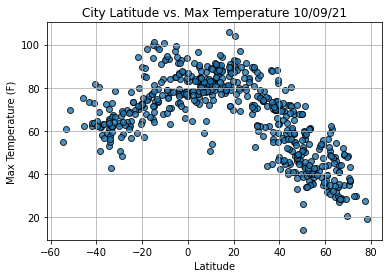

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

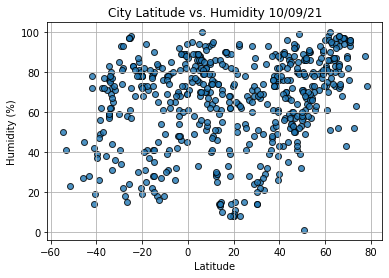

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

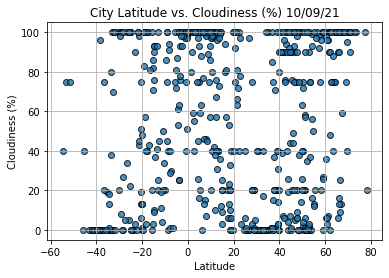

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

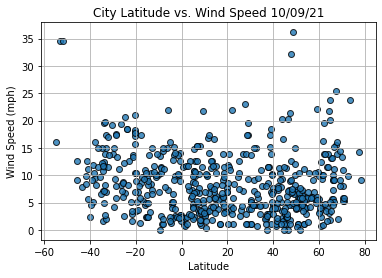

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [30]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [31]:
index13 = city_data_df.loc[13]
index13

City                        Yanam
Country                        IN
Date          2021-10-09 18:38:41
Lat                       16.7333
Lng                       82.2167
Max Temp                    78.55
Humidity                       90
Cloudiness                     57
Wind Speed                   1.03
Name: 13, dtype: object

In [34]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2021-10-09 18:35:01,42.0970,-79.2353,69.39,90,90,8.01
3,Uray,RU,2021-10-09 18:38:34,60.1247,64.7758,34.77,73,36,9.80
4,Kizema,RU,2021-10-09 18:38:35,61.1130,44.8302,44.40,98,100,2.42
7,Mbandaka,CD,2021-10-09 18:38:37,0.0487,18.2603,75.99,87,100,2.24
8,Dikson,RU,2021-10-09 18:38:37,73.5069,80.5464,30.07,63,100,23.82


In [35]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

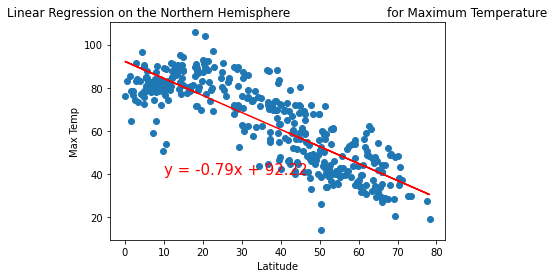

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

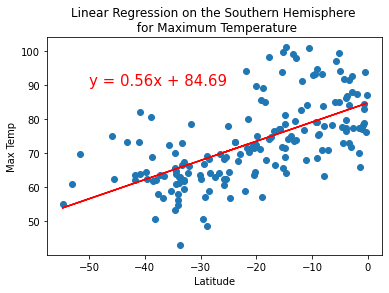

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

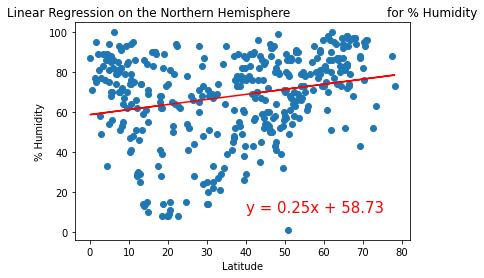

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

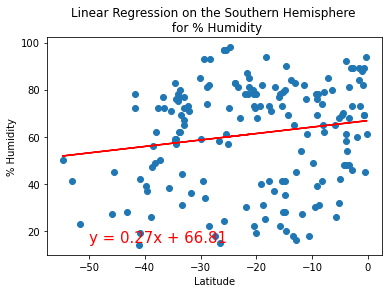

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

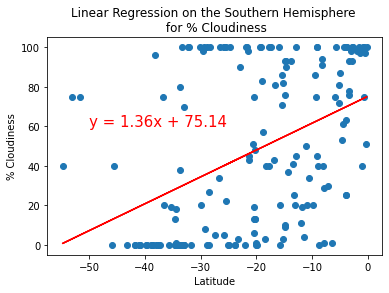

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

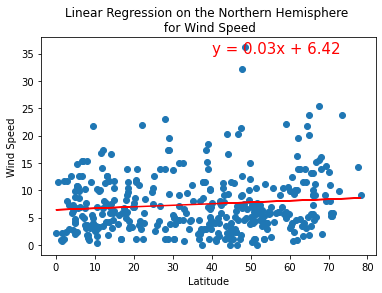

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

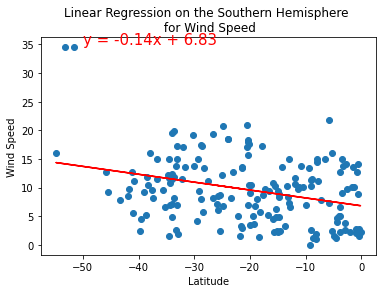

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))